In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text
from Bio.Seq import Seq
from datetime import datetime
from collections import OrderedDict
import logomaker


We load the metadata file for the sampled genomes and the pickle dictionary contatinig the de novo mutations associated with each of the sampled genomes

In [2]:
#We load the metadata file of the sampled genomes
sampled_genomes_df=pd.read_csv("SARS-CoV-2_18000+1.csv")

# Path to the pickle file containing the denovo mutation data for the sampled genomes
pickle_file_path = 'denovo_mutations_in_sampled_genomes.pkl'

# Load the denovo mutation data 
with open(pickle_file_path, 'rb') as file:
    denovo_mutation_data = pickle.load(file)

We extract the nine 6-month timeframes from the metadatada and store it in a list in sorted order 

In [3]:
#We extract the different time periods and sort them based on the date
time_periods=sorted(list(set(sampled_genomes_df["6_Month_Period"].to_list())))

We plot the barplots depicting the trinucleotide mutation rates and the respective position weight matrices for the sampled genomes from each of these time frames for the top six dominant mutation types

/tmp/ipykernel_103612/550635568.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row_count,col_count].set_xticklabels([f"{polynucleotide} ({str(Seq(polynucleotide).reverse_complement())})".replace("T","U") for polynucleotide in trinucleotide_mutation_rates], rotation=270)
/tmp/ipykernel_103612/550635568.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row_count,col_count].set_xticklabels([f"{polynucleotide} ({str(Seq(polynucleotide).reverse_complement())})".replace("T","U") for polynucleotide in trinucleotide_mutation_rates], rotation=270)
/tmp/ipykernel_103612/550635568.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row_count,col_count].set_xticklabels([f"{polynucleotide} ({str(Seq(polynucleotide).reverse_comple

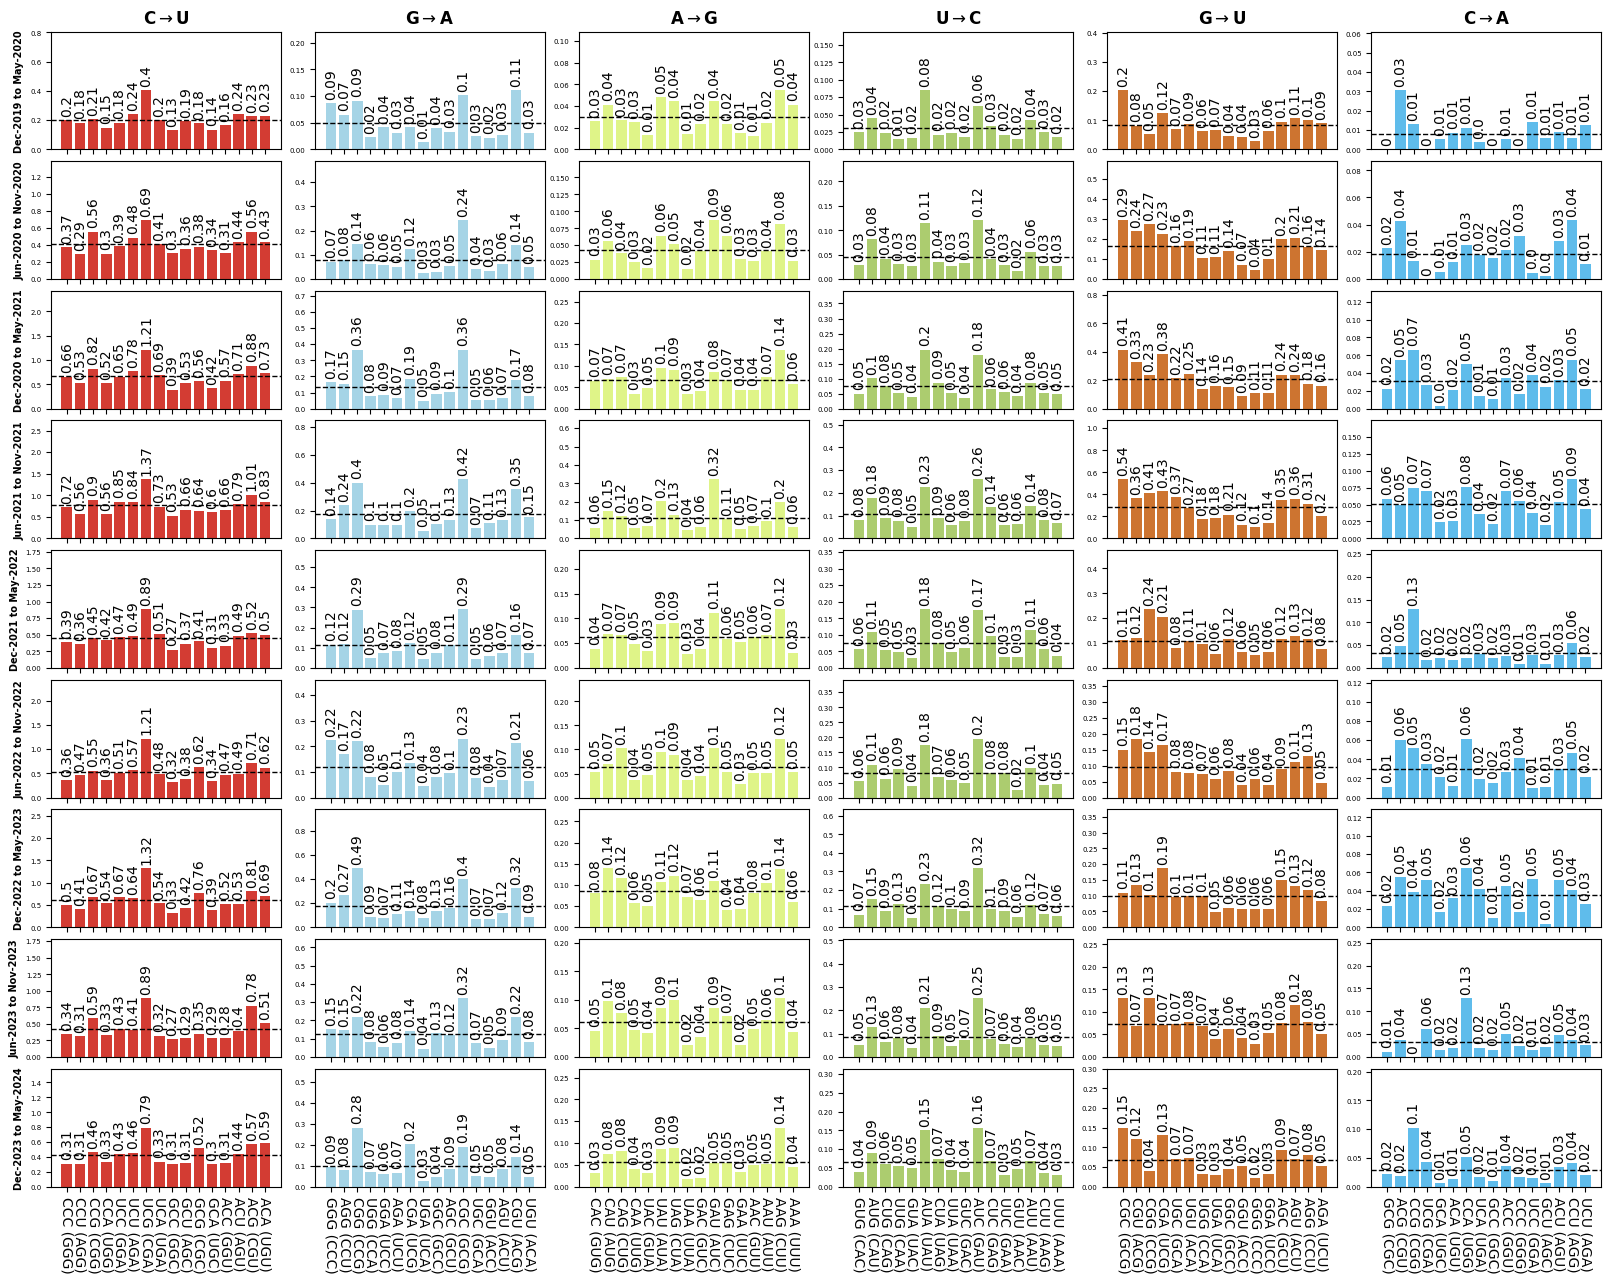

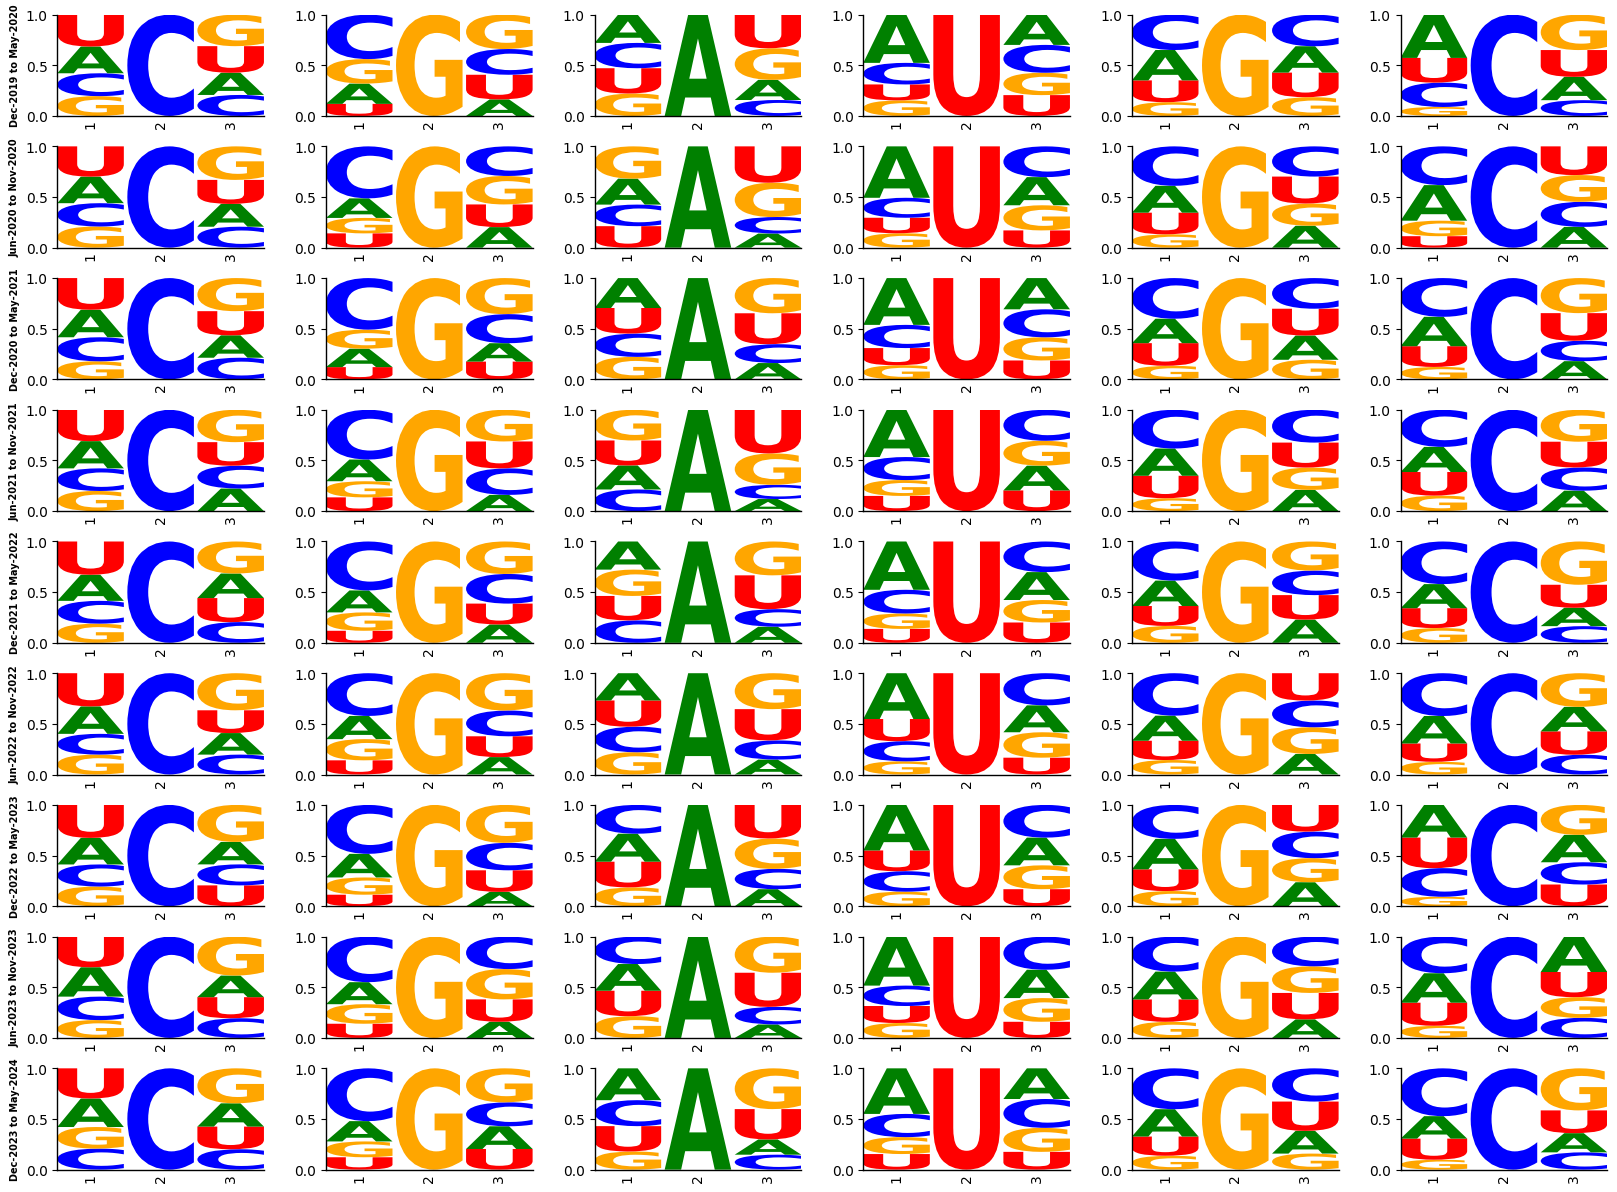

In [4]:

#Top six Mutation types dominating the mutation spectrum
mutation_types=[r"C$\rightarrow$T", r"G$\rightarrow$A",r"A$\rightarrow$G",  r"T$\rightarrow$C", r"G$\rightarrow$T", r"C$\rightarrow$A"]

#Colors assigned  for each mutation type
colors=['#d33c33', '#a5d4e6', '#dff488', '#accc6f', '#cd7430', '#5fbceb']


# Create a dictionary to store the mutation count for mutation type
mutation_count_dict={}

# Create a list of all possible trinucleotides which is later used to index the dictionary storing the mutation rate for each trinucleotide
nucleotides=["C", "T", "G", "A"]
trinucleotide_list=nucleotides.copy()
for i in range(1*2):
    new_list=[]
    for base in nucleotides:
        for old_index in trinucleotide_list.copy():
            new_index=old_index[:int(len(old_index)/2)]+base+old_index[int(len(old_index)/2):]
            new_list.append(new_index)
    trinucleotide_list=new_list    


#FIRST, WE GENERATE THE COMBINED BARPLOTS DEPICTING THE TRINUCLEOTIDE MUTATION RATE FOR EACH TRINUCLEOTIDE FOR EACH TIME PERIOD
#Here, the rows are the time periods and the columns are the mutation types
fig, ax = plt.subplots(len(time_periods),len(mutation_types), figsize=(20, 15))
#variable to store the column count
col_count=0
#We iterate through each mutation type
for mutation_type in mutation_types:
    #variable to store the mutation count for a particular mutation type in each time period
    mutation_count_dict[mutation_type]=[]
    #colour assigned to this mutation type
    color=colors[col_count]
    #variable to store the row count
    row_count=0
    #We iterate through each time period
    for time_period in time_periods:
        #to count the mutstion count for the genome set in each time period
        mutation_count=0
        #We subset the sampled genomes from this time period
        sampled_genomes_df_time_period=sampled_genomes_df[sampled_genomes_df["6_Month_Period"]==time_period]
        #We extract the mutation data for the genomes in this time period
        mutation_data_time_period={}
        for genome in set(sampled_genomes_df_time_period["Accession"]):
            mutation_data_time_period[genome]=denovo_mutation_data[genome]
            
        # Initialize the dictionaries to store the trinucleotide mutation rates for the different mutation types
        trinucleotie_mutation_rate_data={}
        for trinucleotide in trinucleotide_list:
            trinucleotie_mutation_rate_data[trinucleotide]={}
            for nucleotide in nucleotides:
                if(trinucleotide[1]!=nucleotide):
                    trinucleotie_mutation_rate_data[trinucleotide][nucleotide]=0

        #We iterate through each genome sampled in this time period and compute the trinucleotide mutation rate for each trinucleotide
        for this_genome in set(sampled_genomes_df_time_period["Accession"]):
            if(this_genome in set(sampled_genomes_df_time_period["Accession"])):
                trinucleotide_mutations_in_this_genome=denovo_mutation_data[this_genome]
                for trinucleotide_mutation in trinucleotide_mutations_in_this_genome:
                    trinucleotide=trinucleotide_mutation[1]
                    alternate_base=trinucleotide_mutation[0][-1]
                    trinucleotide_muttion_rate=trinucleotide_mutation[2]
                    trinucleotie_mutation_rate_data[trinucleotide][alternate_base]+=trinucleotide_muttion_rate

        #We iterate through each genome in the time period and compute the mutation count for the different mutation types in the given population, which is to be used later
        for this_genome in set(sampled_genomes_df_time_period["Accession"]):
            if(this_genome in set(sampled_genomes_df_time_period["Accession"])):
                trinucleotide_mutations_in_this_genome=denovo_mutation_data[this_genome]
                for trinucleotide_mutation in trinucleotide_mutations_in_this_genome:
                    if(trinucleotide_mutation[0][0]==mutation_type[0] and  trinucleotide_mutation[0][-1] == mutation_type[-1] ):
                        mutation_count+=1

        #We create a dictionary that stores the trinucleotide mutation rates in such a way that it becomes easy to plot the bar plot
        trinucleotide_mutation_rates={}
        for trinucleotide in trinucleotie_mutation_rate_data:
            if(trinucleotide[1]==mutation_type[0]):   
                for alternate_base in trinucleotie_mutation_rate_data[trinucleotide]:
                    if(alternate_base==mutation_type[-1]):   
                        trinucleotide_mutation_rates[trinucleotide]=[trinucleotie_mutation_rate_data[trinucleotide][alternate_base]]

        #We sort the trinucleotide orders in the barplots based on a desired order
        if(col_count%2==0 and row_count==len(time_periods)-1):
            trinucleotide_order=[str(Seq(i).reverse_complement())  for i in list(trinucleotide_mutation_rates.keys())]
        if(col_count%2==1):
            trinucleotide_mutation_rates = OrderedDict((trinucleotide, trinucleotide_mutation_rates[trinucleotide]) for trinucleotide in trinucleotide_order)

        # We now plot the  bar plot
        trinucleotide_mutation_rates_bar_plot = ax[row_count,col_count].bar([f"{polynucleotide}_{str(Seq(polynucleotide).reverse_complement())}" for polynucleotide in trinucleotide_mutation_rates],
                        [trinucleotide_mutation_rates[polynucleotide][0] for polynucleotide in trinucleotide_mutation_rates],
                        color=color)
        
        #We change the time period format for better understanding
        # Split the date range into start and end dates
        start_date_str, end_date_str = time_period.split('--')
        # Convert the strings to datetime objects
        start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
        end_date = datetime.strptime(end_date_str, "%Y-%m-%d")
        # Format the dates to "Month-YYYY"
        start_date_formatted = start_date.strftime("%b-%Y")
        end_date_formatted = end_date.strftime("%b-%Y")
        # Combine the formatted dates
        formatted_date_range = f"{start_date_formatted} to {end_date_formatted}"

        #Styling
        ax[row_count,0].set_ylabel(formatted_date_range, fontsize=7, fontweight='bold') 
        ax[0,col_count].set_title( mutation_type.replace("T","U"), fontweight='bold') 
        # Set y-tick label size
        ax[row_count,col_count].tick_params(axis='y', labelsize=5)  
        # Extend the space on the top for each subplot
        ax[row_count,col_count].set_ylim(0, 2*max(trinucleotide_mutation_rates[polynucleotide][0] for polynucleotide in trinucleotide_mutation_rates)) 
        
        #Display the x-ticks(trinucleotides) for the last row only
        ax[row_count,col_count].set_xticklabels([])
        if(row_count==len(time_periods)-1):
            ax[row_count,col_count].set_xticklabels([f"{polynucleotide} ({str(Seq(polynucleotide).reverse_complement())})".replace("T","U") for polynucleotide in trinucleotide_mutation_rates], rotation=270)


        # Plot the average trinucleotide mutation rates as a dashed line
        ax[row_count,col_count].axhline(np.mean([bar.get_height() for bar in trinucleotide_mutation_rates_bar_plot]), color='black', linestyle='--', linewidth=1) 
        
        # Mention the mutation rates at the top of the trinucleotide bars
        def add_value_labels(ax, bars, counts):
            bar_count = -1
            for bar in bars:
                bar_count += 1
                height = bar.get_height()
                ax.annotate('{}'.format(counts[bar_count]),
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3), 
                            textcoords="offset points",
                            ha='center', va='bottom', rotation=90)  
        add_value_labels(ax[row_count,col_count], trinucleotide_mutation_rates_bar_plot, [round(trinucleotide_mutation_rates[polynucleotide][0],2) for polynucleotide in trinucleotide_mutation_rates])
        
        #We store the mutation counts for each time periods for later use
        mutation_count_dict[mutation_type].append(mutation_count)
        #update the row count
        row_count+=1
    #update the column count
    col_count+=1
    
    # Adjust the space between the subplots
    fig.subplots_adjust(hspace=.1, wspace=.15)  



#NEXT, WE GENERATE THE RESULTING POSITION WEIGHT MATRICES FROM THE TRINUCLEOTIDE MUTATION RATES FOR THE TOP 6 MUTATION TYPES ACROSS THE 9 TIME PERIODS

# Set the width ratios for each subplot
width=1
width_ratios = [width for i in range(0, len(time_periods))]  

# Create subplots
#Here, the rows are the time periods and the columns are the mutation types
fig, ax = plt.subplots(len(time_periods),len(mutation_types), figsize=(20, 15))
#variable to store the column count
col_count=0
#We iterate through each mutation type
for mutation_type in mutation_types:
    #colour assigned to this mutation type
    color=colors[col_count]
    #variable to store the row count
    row_count=0
    #We interate through each time period
    for time_period in time_periods:
        #We subset the sampled genomes in this time period
        sampled_genomes_df_time_period=sampled_genomes_df[sampled_genomes_df["6_Month_Period"]==time_period]
        mutation_data_time_period={}
        for genome in set(sampled_genomes_df_time_period["Accession"]):
            mutation_data_time_period[genome]=denovo_mutation_data[genome]

        #We initialize a dictionary to store the mutation rate for each trinucleotide    
        trinucleotie_mutation_rate_data={}
        for trinucleotide in trinucleotide_list:
            trinucleotie_mutation_rate_data[trinucleotide]={}
            for nucleotide in nucleotides:
                if(trinucleotide[1]!=nucleotide):
                    trinucleotie_mutation_rate_data[trinucleotide][nucleotide]=0

        #We iterate through each genome sampled in this time period and compute the trinucleotide mutation rate for each trinucleotide
        for this_genome in set(sampled_genomes_df_time_period["Accession"]):
            if(this_genome in set(sampled_genomes_df_time_period["Accession"])):
                trinucleotide_mutations_in_this_genome=denovo_mutation_data[this_genome]
                for trinucleotide_mutation in trinucleotide_mutations_in_this_genome:
                    trinucleotide=trinucleotide_mutation[1]
                    alternate_base=trinucleotide_mutation[0][-1]
                    trinucleotide_muttion_rate=trinucleotide_mutation[2]
                    trinucleotie_mutation_rate_data[trinucleotide][alternate_base]+=trinucleotide_muttion_rate

       
        #We create a dictionary that stores the trinucleotide mutation rates in such a way that it becomes easy to compute and plot the position weight matrix
        trinucleotide_mutation_rates={}
        for trinucleotide in trinucleotie_mutation_rate_data:
            if(trinucleotide[1]==mutation_type[0]):
                for alternate_base in trinucleotie_mutation_rate_data[trinucleotide]:
                    if(alternate_base==mutation_type[-1]):
                        trinucleotide_mutation_rates[trinucleotide]=trinucleotie_mutation_rate_data[trinucleotide][alternate_base]


        #Initialize the Position Weight Matrix(PWM) for the given mutation type
        pwm = np.zeros((3, 4))
        #Compute the Position Weight Matrix(PWM) for the given mutation type 
        for trinucleotide in trinucleotide_mutation_rates:
            rate=trinucleotide_mutation_rates[trinucleotide]
            if(rate>0):
                for i in range(0, len(trinucleotide)):
                    if trinucleotide[i] == "A":
                        pwm[i, 0] += rate
                    elif trinucleotide[i] == "C":
                        pwm[i, 1] += rate
                    elif trinucleotide[i] == "G":
                        pwm[i, 2] += rate
                    elif trinucleotide[i] == "T":
                        pwm[i, 3] += rate

        #Normalize the PWM bases
        normalized_pwm = pwm / pwm.sum(axis=1, keepdims=True)
        # Create a DataFrame from the Normalized PWM         
        pwm_df = pd.DataFrame(normalized_pwm, index=[pos for pos in range(1, 4)], columns=["A", "C", "G", "U"])

        #Visualize the position weight matrix
        logo_reference_strand = logomaker.Logo(pwm_df, ax=ax[row_count,col_count], shade_below=0.5, fade_below=0.5)

        # Styling
        logo_reference_strand.style_spines(visible=False)
        logo_reference_strand.style_spines(spines=['left', 'bottom'], visible=True)
        logo_reference_strand.style_xticks(rotation=90, fmt='%d', anchor=0)
        logo_reference_strand.ax.xaxis.set_ticks_position('none')
        logo_reference_strand.ax.xaxis.set_tick_params(pad=-1)
        
        #We mention the time period for each row of the subplots
        #We change the time period format for better understanding
        # Split the date range into start and end dates
        start_date_str, end_date_str = time_period.split('--')
        # Convert the strings to datetime objects
        start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
        end_date = datetime.strptime(end_date_str, "%Y-%m-%d")
        # Format the dates to "Month-YYYY"
        start_date_formatted = start_date.strftime("%b-%Y")
        end_date_formatted = end_date.strftime("%b-%Y")
        # Combine the formatted dates
        formatted_date_range = f"{start_date_formatted} to {end_date_formatted}"

        ax[row_count,0].set_ylabel(formatted_date_range, fontsize=7, fontweight='bold')  

        # Show the plot
        logo_reference_strand.draw()

        #Update the row count
        row_count+=1
    #Update the column count
    col_count+=1
    
    # Adjust the space between the subplots
    fig.subplots_adjust(hspace=.3, wspace=.3)  




Next, we plot how the variation in the mutation counts for the top 6 mutation types in each of the genome sets (each consisting of 2000 genomes) from the nine timeframes

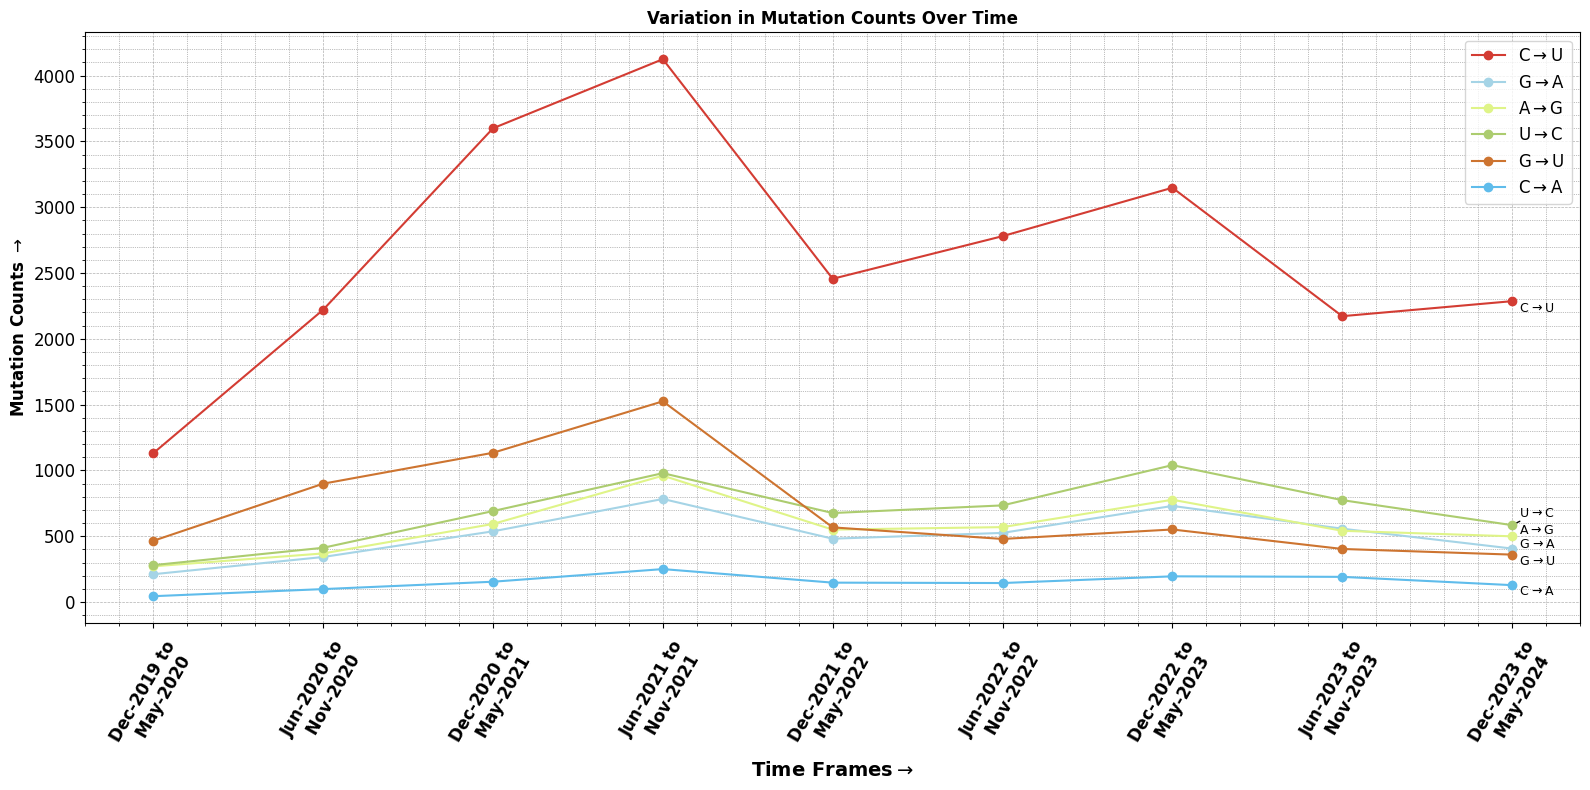

In [5]:

#First, we change the time period format for better understanding
formatted_time_periods=[]
for i in range(len(time_periods)):
    time_period=time_periods[i]
    #Extract the start and end dates
    start_date_str, end_date_str = time_period.split('--')
    # Convert the date strings to datetime objects
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d")
    # Format the dates to "Month-YYYY"
    start_date_formatted = start_date.strftime("%b-%Y")
    end_date_formatted = end_date.strftime("%b-%Y")
    # Combine the formatted dates
    formatted_date_range = f"{start_date_formatted} to \n {end_date_formatted}"
    # Update the time period list with the formatted date range
    formatted_time_periods.append(formatted_date_range)

# List to store text annotations for each of the lines depicitng the mutation type
texts_mutation_types = []  

# Create the line plot
fig, ax = plt.subplots(figsize=(16, 8))  
# Iterate through each mutation type to plot the line graph
for i, (mutation_type, mutation_count) in enumerate(mutation_count_dict.items()):
    line, = ax.plot(formatted_time_periods, mutation_count, linestyle='-', marker='o', label=mutation_type.replace("T", "U"), color=colors[i])
    # Annotate the end point of each line with the associated mutation type
    label_text = f"{mutation_type.replace('T', 'U')}"
    label_x = formatted_time_periods[-1]  # horizontal position to place the label
    label_y = mutation_count[-1]  # vertical position to place the label
    texts_mutation_types.append(ax.text(label_x, label_y, " " + label_text, fontsize=9, verticalalignment='center', ha='left'))

# Styling and others
ax.set_xlabel(r'Time Frames$\rightarrow$', fontsize=14, fontweight='bold')
ax.set_ylabel(r'Mutation Counts $\rightarrow$', fontsize=12, fontweight='bold')
ax.set_title('Variation in Mutation Counts Over Time', fontsize=12, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=60, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

# Adjust the text labels to avoid overlapping
adjust_text(texts_mutation_types, arrowprops=dict(arrowstyle="-", color='black'), only_move='y')

# Make the plot layout tight for better spacing
plt.tight_layout()

plt.show()

Next, we construct pie plots depicting the Dominant variant types and the Collection location of the genomes sampled across the 9 time frames

/tmp/ipykernel_103612/1919332984.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_genomes_df_time_period["Geo_Location"]=sampled_genomes_df_time_period["Geo_Location"].apply(get_country)
/tmp/ipykernel_103612/1919332984.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_genomes_df_time_period["Geo_Location"]=sampled_genomes_df_time_period["Geo_Location"].apply(get_country)
/tmp/ipykernel_103612/1919332984.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

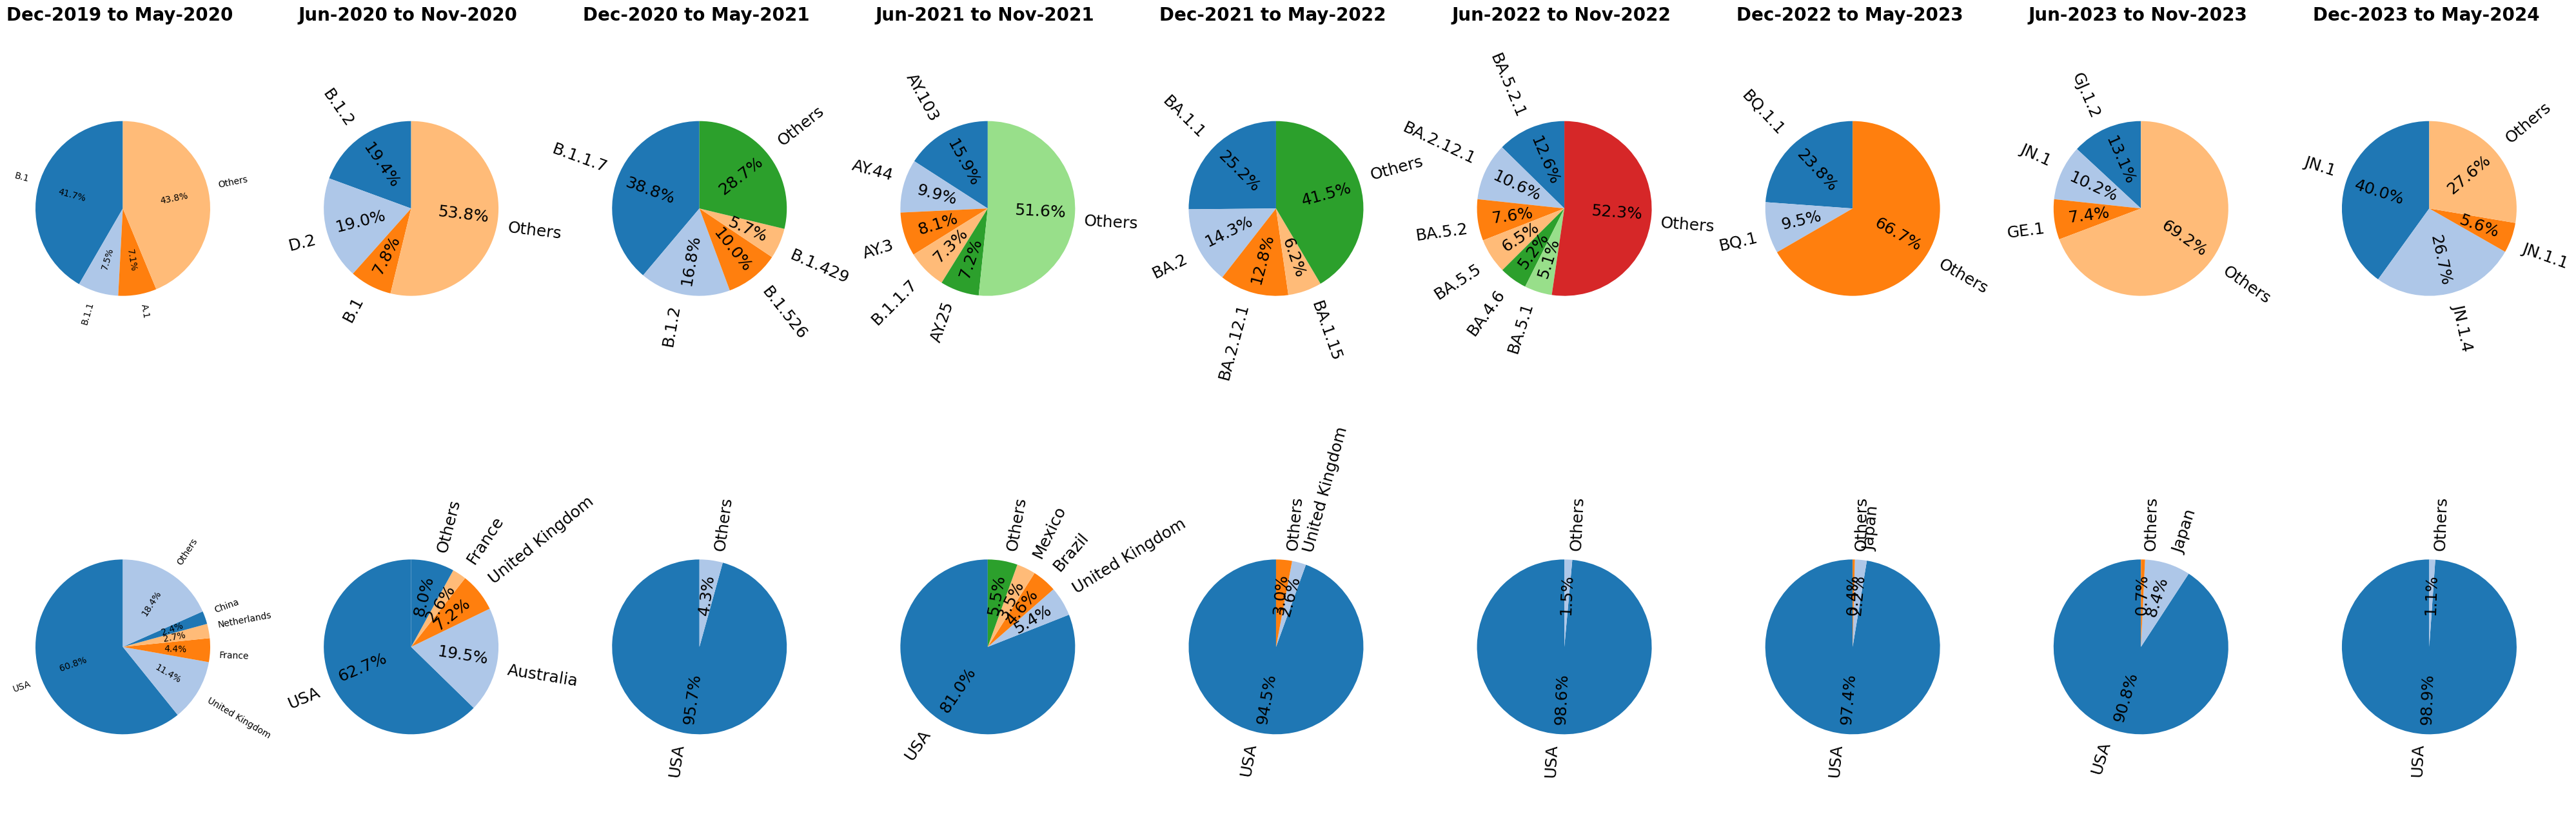

In [7]:
#We generate the pie charts to depict the variant distribution and the countrywise collection location distribution of the sampled genomes in each time period
fig, ax = plt.subplots(2, len(time_periods), figsize=(50, 14))

#variable to store the column count
col_count=0
# Iterate through each time period
for time_period in time_periods:
    # Subset the sampled genomes from this time period
    sampled_genomes_df_time_period=sampled_genomes_df[sampled_genomes_df["6_Month_Period"]==time_period]
    
    # Extract the Assecion IDs of the sampled genpmes from the metadata 
    genome_set=set(sampled_genomes_df_time_period["Accession"])


    #FIRST WE PLOT THE VARIANT(PANGOLIN LINEAGE) DISTRIBUTION OF THE SAMPLED GENOMES IN EACH TIME PERIOD

    #Extract the variant type(Palogin lineages) of the sampled genomes in this time period
    variant_set=set(sampled_genomes_df_time_period["Pangolin"])
    
    # Count the Frequenct of each variant type(Palogin lineages) in this genoe set
    variant_counts = sampled_genomes_df_time_period["Pangolin"].value_counts()

    # Calculate the percentage of each variant type
    variant_percentage = (variant_counts / variant_counts.sum()) * 100
    
    # Filter variant_types with more than 5% population
    filtered_variants = variant_percentage[variant_percentage > 5]

    # Calculate the Others Variant types that are less than 5% of the Population
    others_percentage = 100 - filtered_variants.sum()
    # Add the "Others" category to theese variants which are less than 5% of the population
    filtered_variants["Others"] = others_percentage
    
    # Plot the pie chart
    colors = plt.cm.tab20.colors[:len(filtered_variants)]  
    patches, labels, pct_texts=ax[0, col_count].pie(filtered_variants, labels=filtered_variants.index, autopct='%1.1f%%', startangle=90, colors=colors, rotatelabels=True)
    for label, pct_text in zip(labels, pct_texts):
        pct_text.set_rotation(label.get_rotation())

    #We change the time period format for better understanding
    # Split the date range into start and end dates
    start_date_str, end_date_str = time_period.split('--')
    # Convert the strings to date-time objects
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d")
    # Format the dates to "Month-YYYY"
    start_date_formatted = start_date.strftime("%b-%Y")
    end_date_formatted = end_date.strftime("%b-%Y")
    # Combine the formatted dates
    formatted_date_range = f"{start_date_formatted} to {end_date_formatted}"

    #We add the formatted time period to the title of the subplot
    ax[0, col_count].set_title(formatted_date_range + ' ', fontsize=20, fontweight='bold')  

    # Equal aspect ratio 
    ax[0, col_count].axis('equal')



    #NEXT WE PLOT THE COUNTRYWISE COLLECTION LOCATION DISTRIBUTION OF THE SAMPLED GENOMES IN EACH TIME PERIOD
    
    #Extract the Location of Collection of the sampled genomes in this time period
    location_set = set(sampled_genomes_df_time_period["Geo_Location"])

    # Extract the country information from the Geo_Location column, while ignoring the states
    def get_country(x):
        if pd.isna(x):
            return "Unknown"
        if ":" in x:
            return x.split(":")[0]
        else:
            return x
    sampled_genomes_df_time_period["Geo_Location"]=sampled_genomes_df_time_period["Geo_Location"].apply(get_country)
    
    # Count the frequency of each collection location of the genomes sampled in this time period
    location_counts = sampled_genomes_df_time_period["Geo_Location"].value_counts()
    
    # Calculate the percentage of each collection location
    location_percentage = (location_counts / location_counts.sum()) * 100

    # Collection Locations with more than 2% population are considered as major locations which are displayed in the plot
    filtered_locations = location_percentage[location_percentage > 2]
    # Collection Locations with less than 2% of the total population as included in the "Others" category
    others_percentage = 100 - filtered_locations.sum()
    filtered_locations["Others"] = others_percentage
    
    # Plot the pie chart
    colors = plt.cm.tab20.colors[:len(filtered_variants)]
    patches, labels, pct_texts=ax[1, col_count].pie(filtered_locations, labels=filtered_locations.index, autopct='%1.1f%%', startangle=90, colors=colors, rotatelabels=True)
    for label, pct_text in zip(labels, pct_texts):
        pct_text.set_rotation(label.get_rotation())

    # Equal aspect ratio 
    ax[1, col_count].axis('equal')

    # Set global font size
    plt.rcParams.update({'font.size': 18})  

    # Update the column count
    col_count+=1


# Adjust the space between the subplots
fig.subplots_adjust( wspace=.5, top=1)  

# Display the plot
plt.show()
